# ワインのデータを例に説明します

データは <a href="http://archive.ics.uci.edu/ml/datasets/Wine">UC Irvine Machine Learning Repository</a> から取得したものを少し改変しました。

https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt

## 必要なライブラリのインポート

In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [2]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 

In [3]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

## 必要なデータのダウンロード

In [5]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/wine.txt"
urllib.request.urlretrieve(url, 'wine.txt') 

('wine.txt', <http.client.HTTPMessage at 0x11d029198>)

## データの読み込みと確認

In [5]:
df = pd.read_csv("wine.txt", sep="\t", index_col=0)

In [6]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


第1列目の「class」というのが品種で、それ以降の列はいろんな観測値です。まずは第1列目以外の散布図行列を作り、第1列目で色分けすることにより、データを概観してみましょう。

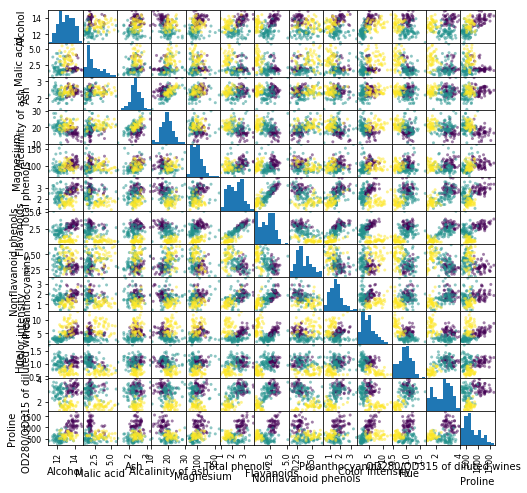

In [7]:
from pandas import plotting 
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5)
plt.show()

3品種の特徴がなんとなく分かれていることが見えてきますね。もっと少ない変数で特徴を説明できないでしょうか。

# scikit-learn を使った主成分分析

## 行列の標準化

（第1列目以外の）各列に対して、平均値で割ったものを標準偏差で割ります。

In [8]:
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


## 主成分分析

In [9]:
#主成分分析の実行
pca = PCA()
feature = pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

### 主成分得点

横軸が主成分(PC1, PC2, PC3, ....)、縦軸が各サンプルになります。

In [10]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749,0.064956,0.639638,1.018084,-0.450293,0.539289,-0.066052
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624,1.021534,-0.307978,0.159252,-0.142256,0.387146,0.003626
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012,-0.343248,-1.174521,0.113042,-0.285866,0.000582,0.021655
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259,0.641783,0.052397,0.238739,0.757448,-0.241339,-0.368444
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825,0.415528,0.325900,-0.078146,-0.524466,-0.216055,-0.079140


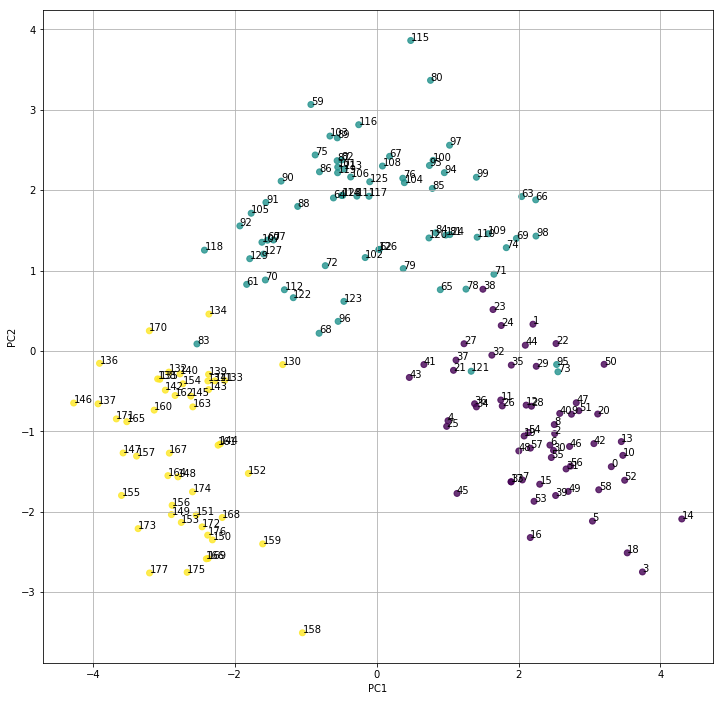

In [12]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(12, 12))
for x, y, name in zip(feature[:, 0], feature[:, 1], df.index):
    plt.text(x, y, name)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [46]:
df2 = df.iloc[[115, 14, 146, 
                 59, 3, 158, 
                 125, 42, 155, 
                 106, 45, 167, 
                 96, 27, 130, 
                 75, 46, 154, 
                 123, 43], :]

In [48]:
df3 = df2[['Alcohol', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue']]
df3

,Alcohol,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue
115,11.03,2.17,0.52,2.01,1.90,1.71
14,14.38,3.64,0.29,2.96,7.50,1.20
146,13.88,0.34,0.40,0.68,4.90,0.58
59,12.37,0.57,0.28,0.42,1.95,1.05
3,14.37,3.49,0.24,2.18,7.80,0.86
158,14.34,1.31,0.53,2.70,13.00,0.57
125,12.07,2.65,0.37,1.35,2.76,0.86
42,13.88,3.56,0.17,1.70,5.43,0.88
155,13.17,0.63,0.61,1.55,7.90,0.60
106,12.25,2.03,0.37,1.63,3.40,1.00


In [49]:
df3.to_csv("wine.csv")

In [43]:
#主成分分析の実行
pca = PCA()
feature = pca.fit(dfs3)
# データを主成分空間に写像
feature = pca.transform(dfs3)

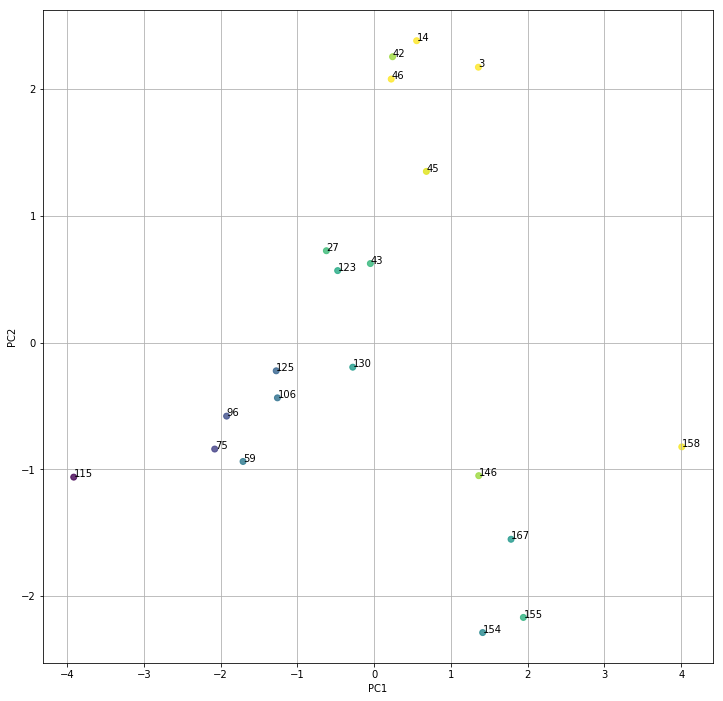

In [44]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(12, 12))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs3.index):
    plt.text(x, y, name)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(dfs3.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

第二主成分(PC2)までで、十分に3品種の区別ができそうです。

ValueError: 'c' argument has 178 elements, which is not acceptable for use with 'x' with size 20, 'y' with size 20.

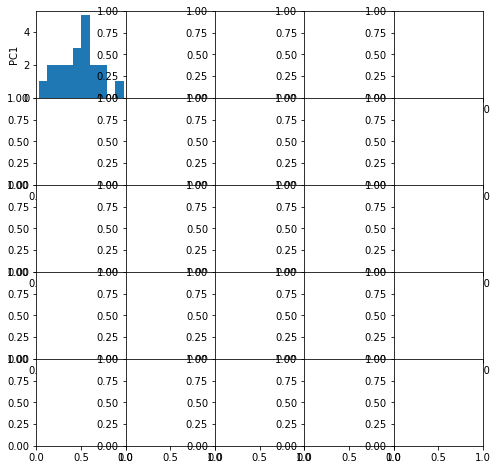

In [26]:
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs3.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

3品種を区別するだけの目的なら、第2主成分までで何とかなりそうです。

### 寄与率と累積寄与率

寄与率と累積寄与率は、第何主成分まででどのくらいの情報を説明できるかという指標です。

In [13]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.361988
PC2,0.192075
PC3,0.111236
PC4,0.070690
PC5,0.065633
PC6,0.049358
PC7,0.042387
PC8,0.026807
PC9,0.022222
PC10,0.019300


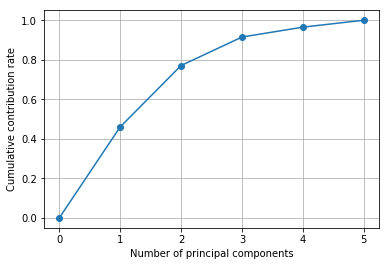

In [39]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

### PCAの固有値と固有ベクトル

各主成分の固有値は以下のとおりになります。

In [15]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


各主成分の固有ベクトルは以下のとおりになります。縦軸の数字が主成分になります。

In [16]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=df.columns[1:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
PC7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
PC8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
PC9,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
PC10,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


第一主成分と第二主成分における観測変数の寄与度をプロットすることにより、各成分が何を考慮した値なのかのヒントが得られます。

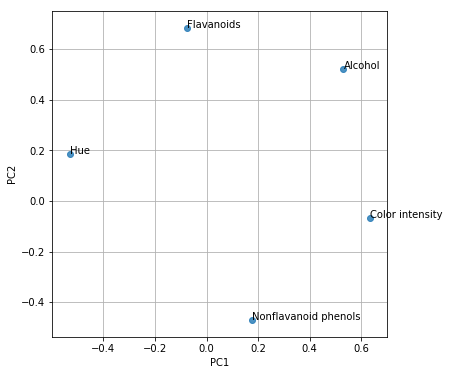

In [40]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], dfs3.columns):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

はい、とっても便利ですね。便利すぎて意味分かんないですね。

# 演習：勉強のために、成分数を減らします。

以下の4つの変数だけ考えることにします。

In [21]:
dfs = dfs[['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']]

In [22]:
#主成分分析を実行してください。
#主成分分析の実行
pca = PCA()
feature = pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

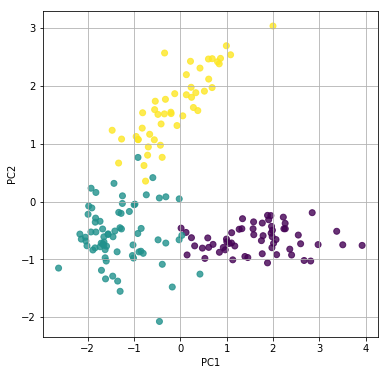

In [23]:
# 第一主成分と第二主成分でプロットしてください。
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

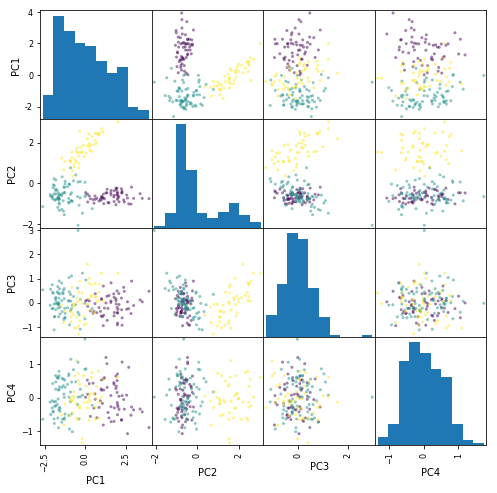

In [24]:
# PC1〜PC4 で散布図行列を描いてください。
from pandas import plotting 
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]), 
                        figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5) 
plt.show()

In [22]:
# 寄与率を計算してください。

,0
PC1,0.533531
PC2,0.309520
PC3,0.084787
PC4,0.072162


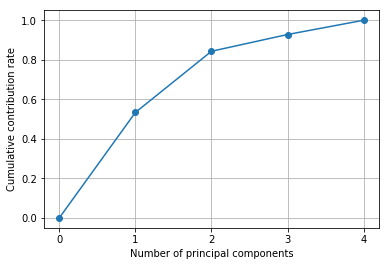

In [23]:
# 累積寄与率を図示してください。

In [24]:
# 各主成分の固有値を計算してください。

,0
PC1,2.134122
PC2,1.238082
PC3,0.339148
PC4,0.288648


In [25]:
# 各主成分の固有ベクトルを計算してください。

,Color intensity,Flavanoids,Alcohol,Proline
PC1,0.409416,0.325547,0.605601,0.599704
PC2,0.633932,-0.725357,0.168286,-0.208967
PC3,0.636547,0.566896,-0.388715,-0.349768
PC4,-0.159113,0.215651,0.673667,-0.688731


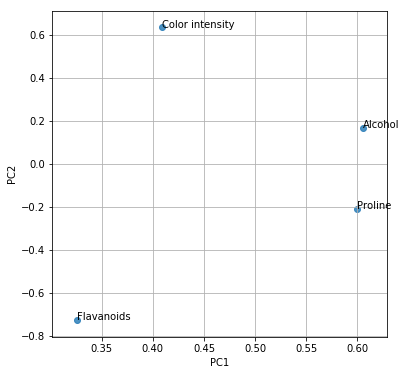

In [26]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], ['Color intensity', 'Flavanoids', 'Alcohol', 'Proline']):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

この固有ベクトルから、ある程度の解釈ができます。

第1主成分は、全ての観測値を正方向に加味した総合指標のようなもの（ワインにとって、全て正であることが良いとは限りませんが）であり、特に「アルコール濃度」に重みを置いた指標になっています。

第2主成分は、「色の濃さ」を正に、「フラボノイド濃度」を負に評価した指標になっています。

このような指標は、ワインの特徴の違いを解釈する助けになるでしょう。

# scikit-learn を使わず pandas と numpy で主成分分析する

## まずは第1主成分(PC1)

### 相関行列

In [26]:
# 相関行列
dfc = dfs.corr()

In [27]:
dfc

,Color intensity,Flavanoids,Alcohol,Proline
Color intensity,1.000000,-0.172379,0.546364,0.316100
Flavanoids,-0.172379,1.000000,0.236815,0.494193
Alcohol,0.546364,0.236815,1.000000,0.643720
Proline,0.316100,0.494193,0.643720,1.000000


### 相関行列の固有値と固有ベクトル

In [28]:
# 固有値と固有ベクトル
eig_val, eig_vec =np.linalg.eig(dfc)

In [29]:
# 固有値
eig_val

array([2.13412212, 1.23808176, 0.33914837, 0.28864774])

In [30]:
# 固有ベクトル
eig_vec

array([[-0.40941602,  0.63393186, -0.63654682,  0.15911338],
       [-0.32554699, -0.72535703, -0.56689587, -0.21565114],
       [-0.60560142,  0.16828625,  0.38871536, -0.67366685],
       [-0.59970376, -0.20896726,  0.34976791,  0.68873107]])

### 第1主成分(PC1)の固有ベクトル

In [31]:
# 相関行列の固有ベクトルの第1列を、主成分分析では「第1主成分(PC1)の固有ベクトル」と言います
eig_vec_pc1 = eig_vec[:, 0]
eig_vec_pc1

array([-0.40941602, -0.32554699, -0.60560142, -0.59970376])

In [ ]:
# scikit-learn による計算結果と照合してください。正負が逆転することがありますが、気になさらずに。

### 第1主成分(PC1)の主成分得点

In [33]:
# 主成分得点(PC1)
pc1 = np.dot(dfs, eig_vec_pc1)
pc1

array([-1.96158489, -0.84437069, -1.45764803, -3.37794671, -0.24091918,
       -2.97597478, -2.26455503, -1.98932577, -2.26730282, -1.95585222,
       -2.81622301, -1.97061483, -1.98429472, -2.67430795, -3.50890694,
       -2.22484682, -2.54821609, -2.06733131, -3.92689454, -0.99735336,
       -1.3296379 , -0.01685181, -1.13293227, -0.31004679, -0.47699845,
       -0.14615498, -1.39507959, -1.10478452, -1.17671713, -1.34387136,
       -2.08008249, -2.59856235, -0.96999543, -1.78804312, -1.05456986,
       -1.00453015, -0.59308299, -0.70670392, -0.53106241, -1.27140504,
       -1.10909632, -0.9287257 , -1.88349832, -0.12368722, -0.61303024,
       -1.77096318, -1.97864591, -1.75185362, -1.90835535, -2.84877329,
       -1.58715156, -2.01419305, -2.36441818, -2.23735474, -1.57147534,
       -1.58299377, -1.88433998, -1.76975075, -2.40377192,  1.9270171 ,
        1.24956142,  0.91404783,  0.0234326 ,  0.85137293,  1.82924743,
        0.48021577, -0.03299298,  0.99787085,  0.31203842,  1.27

In [ ]:
# scikit-learn による計算結果と照合してください。正負が逆転することがありますが、気になさらずに。

### 第1主成分(PC1)の固有値

In [35]:
# 相関行列の固有値の第1成分を、主成分分析では「第1主成分(PC1)の固有値」と言います
eig_val_pc1 = eig_val[0]
eig_val_pc1

2.1341221243556294

In [ ]:
# scikit-learn による計算結果と照合してください。

## 次に第2主成分 (PC2)

### PC1の影響を取り除いた相関行列2

In [37]:
# 相関行列から、PC1の影響を取り除いた相関行列2を作成します
matrix = []
for d1 in eig_vec_pc1:
    mat = []
    for d2 in eig_vec_pc1:
        mat.append(d1 * d2)
    matrix.append(mat)
matrix = np.array(matrix)
dfc2 = dfc - matrix * eig_val_pc1
dfc2

,Color intensity,Flavanoids,Alcohol,Proline
Color intensity,0.642275,-0.456824,0.017224,-0.207887
Flavanoids,-0.456824,0.773824,-0.183931,0.077545
Alcohol,0.017224,-0.183931,0.217304,-0.131354
Proline,-0.207887,0.077545,-0.131354,0.232474


### PC1の影響を取り除いた相関行列2の固有値と固有ベクトル

In [38]:
# 固有値と固有ベクトル を求めてください。

### 第2主成分(PC2)の固有ベクトル

In [ ]:
# 相関行列2の固有ベクトルの第1列を、主成分分析では「第2主成分(PC2)の固有ベクトル」と言います。
# 第2主成分(PC2)の固有ベクトルを求め、scikit-learn による計算結果と照合してください。

### 第2主成分(PC2)の主成分得点

In [ ]:
# 主成分得点(PC2)を求め、scikit-learn による計算結果と照合してください。

### 第2主成分(PC2)の固有値

In [ ]:
# 相関行列2の固有値の第1成分を、主成分分析では「第2主成分(PC2)の固有値」と言います
# 第2主成分(PC2)の固有値を求め、scikit-learn による計算結果と照合してください。

## 続いて第3主成分 (PC3)

### PC2の影響を取り除いた相関行列3

In [44]:
# 相関行列2から、PC2の影響を取り除いた相関行列3を作成してください。

,Color intensity,Flavanoids,Alcohol,Proline
Color intensity,0.144728,0.112479,-0.114857,-0.043877
Flavanoids,0.112479,0.122416,-0.032801,-0.110119
Alcohol,-0.114857,-0.032801,0.182241,-0.087815
Proline,-0.043877,-0.110119,-0.087815,0.178411


### PC2の影響を取り除いた相関行列3の固有値と固有ベクトル

In [45]:
# 固有値と固有ベクトルを求めてください。

### 第3主成分(PC3)の固有ベクトル

In [ ]:
# 相関行列3の固有ベクトルの第1列を、主成分分析では「第3主成分(PC3)の固有ベクトル」と言います
# 第3主成分(PC3)の固有ベクトルを求め、scikit-learn による計算結果と照合してください。

### 第3主成分(PC3)の主成分得点

In [ ]:
# 主成分得点(PC3)を求め、scikit-learn による計算結果と照合してください。

### 第3主成分(PC3)の固有値

In [ ]:
# 相関行列3の固有値の第1成分を、主成分分析では「第3主成分(PC3)の固有値」と言います
# 第3主成分(PC3)の固有値を求め、scikit-learn による計算結果と照合してください。

## 最後に第4主成分

### PC3の影響を取り除いた相関行列4

In [51]:
# 相関行列2から、PC2の影響を取り除いた相関行列3を作成してください。

,Color intensity,Flavanoids,Alcohol,Proline
Color intensity,0.007308,-0.009904,-0.030940,0.031632
Flavanoids,-0.009904,0.013424,0.041934,-0.042872
Alcohol,-0.030940,0.041934,0.130996,-0.133925
Proline,0.031632,-0.042872,-0.133925,0.136920


### PC3の影響を取り除いた相関行列4の固有値と固有ベクトル

In [52]:
# 固有値と固有ベクトルを求めてください。

### 第4主成分(PC4)の固有ベクトル

In [ ]:
# 相関行列4の固有ベクトルの第1列を、主成分分析では「第4主成分(PC4)の固有ベクトル」と言います
# 第4主成分(PC4)の固有ベクトルを求め、scikit-learn による計算結果と照合してください。

### 第4主成分(PC4)の主成分得点

In [ ]:
# 主成分得点(PC4)を求め、scikit-learn による計算結果と照合してください。

### 第4主成分(PC4)の固有値

In [ ]:
# 相関行列4の固有値の第1成分を、主成分分析では「第4主成分(PC4)の固有値」と言います
# 第4主成分(PC4)の固有値を求め、scikit-learn による計算結果と照合してください。

## 寄与率

各主成分の固有値を足し合わせて割合をとったものを「寄与率」といいます。

In [58]:
eig_val_pca = np.array([eig_val_pc1, eig_val_pc2, eig_val_pc3, eig_val_pc4])
eig_val_pca

array([2.13412212, 1.23808176, 0.33914837, 0.28864774])

In [59]:
eig_val_pca / eig_val_pca.sum()

array([0.53353053, 0.30952044, 0.08478709, 0.07216194])

In [ ]:
# scikit-learn による計算結果と照合してください。

# 課題

* 相関行列を作るには、 pandas の関数 .corr() や、 numpy の関数 .corrcoef() などがある。これらの関数を使わずに相関行列を作る関数を自作してください。また、その時間計測をして比較してください。

* <a href="https://qiita.com/maskot1977/items/453eddf5aa154c04668c">実習用データ</a> にある 「都道府県別アルコール類の消費量」 のデータを主成分分析し、その結果の解釈をしてください。